In [1]:
import sys
sys.path.append("..")

from speech_encoder import SpeechEncoder
from speech_encoder_v2_updated import SpeechEncoderV2
from params import *
from pathlib import Path
import torch
import utils
import visualisations
from data_scripts import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_device = torch.device("cpu")

encoder_v1 = SpeechEncoder(device, loss_device)
encoder_v2 = SpeechEncoderV2(device, device)

checkpoints_v1 = torch.load("..\models\speech_encoder_lstm\encoder.pt")
checkpoints_v2 = torch.load("..\models\speech_encoder_transformer_updated\encoder_073500_loss_0.0724.pt")

encoder_v1.load_state_dict(checkpoints_v1['model_state'])
encoder_v2.load_state_dict(checkpoints_v2['model_state'])

c:\Users\anike\anaconda3\envs\gpu_environment\lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


<All keys matched successfully>

c:\Users\anike\anaconda3\envs\gpu_environment\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Preprocessing wavs: 100%|██████████| 100/100 [00:03<00:00, 26.48it/s]
c:\Users\anike\anaconda3\envs\gpu_environment\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


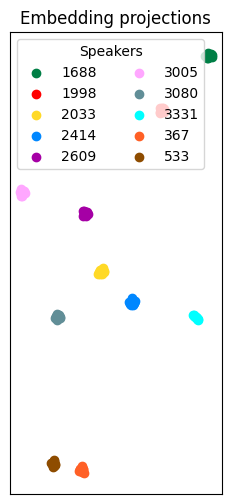

In [3]:
from temp.demo_utils import *
from itertools import groupby
from pathlib import Path
from tqdm import tqdm
import numpy as np
from data_preprocessing import *
from temp import audio
from embed import Embed

embedder = Embed(encoder_v1)
wav_fpaths = list(Path("D:\CODING\Voice Encoder\Resemblyzer/audio_data", "librispeech_test-other").glob("**/*.flac"))
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs = np.array(list(map(audio.preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths)))), dtype=object)
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}


utterance_embeds = np.array(list(map(embedder.embed_utterance, wavs)))


## Project the embeddings in 2D space
plot_projections(utterance_embeds, speakers, title="Embedding projections")
plt.show()

Preprocessing wavs: 100%|██████████| 100/100 [00:01<00:00, 78.86it/s]
c:\Users\anike\anaconda3\envs\gpu_environment\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


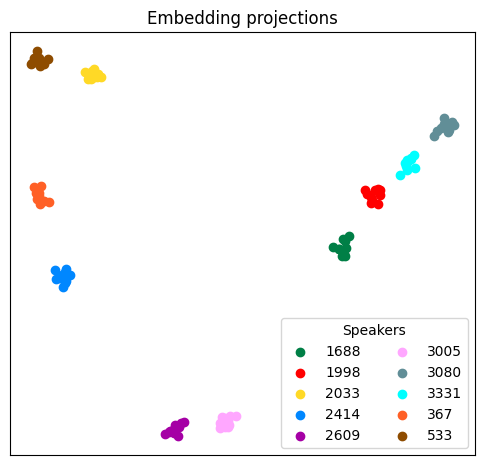

In [4]:
from temp.demo_utils import *
from itertools import groupby
from pathlib import Path
from tqdm import tqdm
import numpy as np
from data_preprocessing import *
from temp import audio
from embed import Embed

embedder = Embed(encoder_v2)
wav_fpaths = list(Path("D:\CODING\Voice Encoder\Resemblyzer/audio_data", "librispeech_test-other").glob("**/*.flac"))
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs = np.array(list(map(audio.preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths)))), dtype=object)
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}


utterance_embeds = np.array(list(map(embedder.embed_utterance, wavs)))


## Project the embeddings in 2D space
plot_projections(utterance_embeds, speakers, title="Embedding projections")
plt.show()